In [5]:
import pandas as pd

url = 'https://raw.githubusercontent.com/CostatoMarco/ProgettoML/main/drug200.csv'
df = pd.read_csv(url,index_col=0)
feature_names = ['Sex', 'BP', 'Cholesterol', 'Na_to_K']

df.reset_index(drop=True, inplace=True)
df.rename(columns={'index': 'ID'}, inplace=True)
mapping = {'LOW' : 0, 'NORMAL' : 1, 'HIGH' : 2}

df['BP']  = df['BP'].map(mapping)
df['Cholesterol'] = df['Cholesterol'].map(mapping)
df['Sex'] = df['Sex'].map({'F' : 0, 'M' : 1})
df.head()


,Sex,BP,Cholesterol,Na_to_K
0,0,2,2,25.355
1,1,0,2,13.093
2,1,0,2,10.114
3,0,1,2,7.798
4,0,0,2,18.043
...,...,...,...,...
195,0,0,2,11.567
196,1,0,2,12.006
197,1,1,2,9.894
198,1,1,1,14.020


In [41]:
! pip install matplotlib


[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


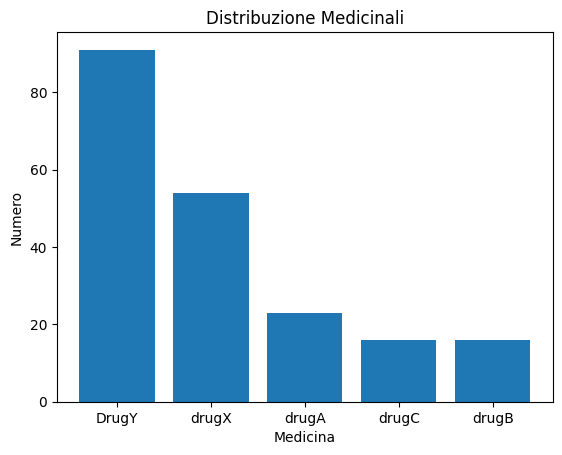

In [46]:
import matplotlib.pyplot as plt
index = df['Drug'].value_counts().index
values = df['Drug'].value_counts().values
plt.bar(index, values)
plt.title("Distribuzione Medicinali")
plt.xlabel("Medicina")
plt.ylabel("Numero")
plt.show()

In [ ]:
! pip install scikit-learn
from sklearn.model_selection import train_test_split

In [ ]:
# Split del dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['Drug'],
                                                    test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


# creazione e addestramento del classificatore
clf = MultinomialNB()
clf.fit(X_train y_train)

# classificazione del test set
y_pred = clf.predict(X_test)

# calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
! pip install keras

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train['Na_to_K'] = scaler.fit_transform(X_train['Na_to_K'])
X_test['Na_to_K'] = scaler.transform(X_test['Na_to_K'])

X_train.describe()

In [ ]:
import keras

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Definiamo l'archietettura della rete neurale:
# un primo layer di input con 4 neuroni (perchè ci sono 4 features in input)
# un scondo layer con 3 neuroni
# un ultimo layer con 3 neuroni, poiché la label è un vettore di 3 componenti (es [0, 1, 0])
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=5, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])